In [36]:
import numpy as np
import pandas as pd
pd.set_option('precision', 10)

import scipy.sparse
import pickle
import xgboost as xgb

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8,5

import mix as mix
import model as pf

X_train = pd.read_csv('./date/model1_train.csv')
mix.set_index_date(X_train, 'Unnamed: 0')

X_test = pd.read_csv('./date/model1_test.csv')
mix.set_index_date(X_test, 'Unnamed: 0')

target_train = X_train[['value']]
target_test = X_test[['value']]

X_train = X_train.drop(['value'], axis=1)
X_test = X_test.drop(['value'], axis=1)

In [37]:
X_train.head()

,real 0 days 00:00:00,real 1 days 00:00:00,real 2 days 00:00:00,real 363 days 00:00:00,real 364 days 00:00:00
Unnamed: 0,,,,,
2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN
2015-12-30 21:00:00,NaN,NaN,NaN,NaN,NaN
2015-12-29 21:00:00,-19.9,-19.10,-15.95,-16.9,-20.1
2015-12-28 21:00:00,-21.6,-15.95,-17.55,-20.1,-19.9
2015-12-27 21:00:00,-18.6,-17.55,-18.20,-19.9,-21.6


In [38]:
X_train.shape

(1048, 5)

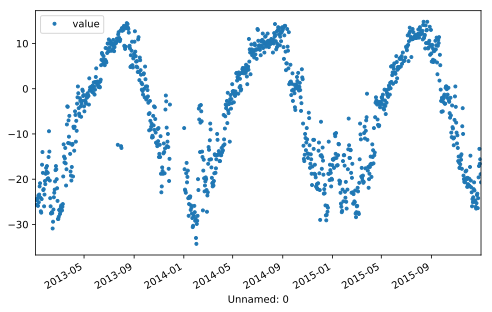

In [39]:
target_train.plot(style='.')

In [40]:
X_test.head()

,real 0 days 00:00:00,real 1 days 00:00:00,real 2 days 00:00:00,real 3 days 00:00:00,real 361 days 00:00:00,real 362 days 00:00:00,real 363 days 00:00:00,real 364 days 00:00:00,real 365 days 00:00:00
Unnamed: 0,,,,,,,,,
2018-06-03 21:00:00,3.84,4.3500000000,3.0000000000,3.4000000000,NaN,NaN,5.60,2.98,NaN
2018-06-02 21:00:00,4.14,3.0000000000,4.3000000000,3.4666666667,NaN,NaN,6.00,3.84,NaN
2018-06-01 21:00:00,3.00,4.3000000000,3.4000000000,4.6000000000,NaN,NaN,6.35,4.14,NaN
2018-05-31 21:00:00,4.08,3.4000000000,4.0833333333,2.5000000000,NaN,NaN,6.10,3.00,NaN
2018-05-30 21:00:00,3.74,4.0833333333,3.1166666667,2.8333333333,NaN,NaN,2.30,4.08,NaN


In [41]:
X_test.shape


(849, 9)

In [42]:
X_test = X_test.drop(['real 3 days 00:00:00', 'real 365 days 00:00:00', 
                      'real 361 days 00:00:00', 'real 362 days 00:00:00'], axis=1)
X_test.head()

,real 0 days 00:00:00,real 1 days 00:00:00,real 2 days 00:00:00,real 363 days 00:00:00,real 364 days 00:00:00
Unnamed: 0,,,,,
2018-06-03 21:00:00,3.84,4.3500000000,3.0000000000,5.60,2.98
2018-06-02 21:00:00,4.14,3.0000000000,4.3000000000,6.00,3.84
2018-06-01 21:00:00,3.00,4.3000000000,3.4000000000,6.35,4.14
2018-05-31 21:00:00,4.08,3.4000000000,4.0833333333,6.10,3.00
2018-05-30 21:00:00,3.74,4.0833333333,3.1166666667,2.30,4.08


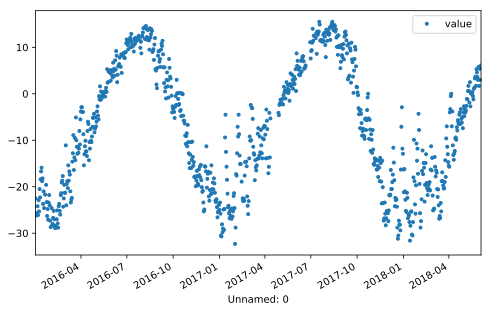

In [43]:
target_test.plot(style='.')

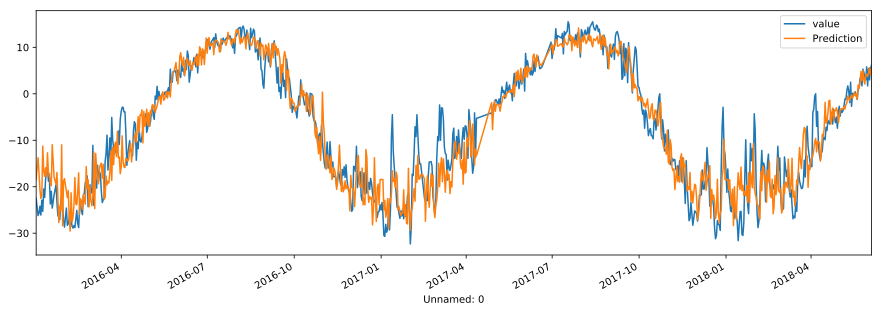

In [50]:
reg = xgb.XGBRegressor(n_estimators=1000, verbosity=3)

reg.fit(X_train, target_train) # Change verbose to True if you want to see it train

# # # This is a metric that simply sums up how many times each feature is split on.
# # _ = xgb.plot_importance(reg, height=0.9)

target_test['Prediction'] = reg.predict(X_test)
# pjme_all = pd.concat([pjme_test, pjme_train], sort=False)

_ = target_test.plot(figsize=(15, 5))


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=target_test['value'],
                   y_pred=target_test['Prediction'])

19.77192433485796

In [52]:

mean_absolute_error(y_true=target_test['value'],
                   y_pred=target_test['Prediction'])

3.2924046165109107

In [62]:
target_test['abs_error'] = (target_test['value'] - target_test['Prediction']).apply(np.abs)

target_test.sort_values('abs_error', ascending=False).head(20)

,value,Prediction,abs_error
Unnamed: 0,,,
2017-03-03 21:00:00,-2.4,-19.9673671722,17.5673671722
2017-02-05 21:00:00,-7.1,-23.1056423187,16.0056423187
2018-01-30 21:00:00,-4.3,-20.2044982910,15.9044982910
2017-03-06 21:00:00,-3.1,-18.9210205078,15.8210205078
2018-01-13 21:00:00,-31.6,-17.0184364319,14.5815635681
2017-02-07 21:00:00,-4.5,-19.0466499329,14.5466499329
2016-01-08 21:00:00,-25.3,-11.2514295578,14.0485704422
2018-01-31 21:00:00,-7.8,-21.5501308441,13.7501308441
2016-01-18 21:00:00,-24.6,-10.9511194229,13.6488805771


In [66]:
target_test.sort_values('abs_error', ascending=True).head(20)

,value,Prediction,abs_error
Unnamed: 0,,,
2016-04-30 21:00:00,-7.0,-7.0094580650,0.0094580650
2016-09-18 21:00:00,4.6,4.6125998497,0.0125998497
2017-03-22 21:00:00,-12.6,-12.6140136719,0.0140136719
2016-09-07 21:00:00,10.8,10.7856407166,0.0143592834
2017-06-03 21:00:00,6.0,5.9805016518,0.0194983482
2018-03-01 21:00:00,-24.9,-24.9230422974,0.0230422974
2018-04-11 21:00:00,-12.8,-12.7694778442,0.0305221558
2016-10-04 21:00:00,-2.8,-2.7591452599,0.0408547401
2016-08-01 21:00:00,13.2,13.2412433624,0.0412433624


In [65]:
error = target_test[['abs_error']].groupby([target_test.index.year, target_test.index.month]).max()

error.sort_values('abs_error', ascending=False).head(20)

abs_error
Unnamed: 0 Unnamed: 0               
2017       3           17.5673671722
           2           16.0056423187
2018       1           15.9044982910
2016       1           14.0485704422
           3           13.5484050751
2017       12          13.2244812012
           1           12.0876480103
2016       4           11.9848876953
           2           11.7681434631
2017       4           11.2169040680
2016       10          10.7462705612
2018       3           10.3507875443
2017       11           9.8580215454
2018       4            9.7788333893
2016       12           9.5390737534
           9            8.8511121750
2018       2            8.6574447632
2016       8            8.4766883850
2017       9            8.2483350039
           10           6.9641440868

In [67]:
error.sort_values('abs_error', ascending=True).head(20)

abs_error
Unnamed: 0 Unnamed: 0               
2018       6            2.6227054596
           5            3.1377506256
2016       7            3.6691013336
2017       7            4.5393762589
           5            5.0179906130
           6            5.1349887371
2016       6            5.3373260498
2017       8            5.3769769669
2016       5            5.9473590136
           11           6.7211544037
2017       10           6.9641440868
           9            8.2483350039
2016       8            8.4766883850
2018       2            8.6574447632
2016       9            8.8511121750
           12           9.5390737534
2018       4            9.7788333893
2017       11           9.8580215454
2018       3           10.3507875443
2016       10          10.7462705612